# Assignment: Original Case Study Part 1 - Graduate Admissions
# Author: Robert Zacchigna

## Dataset:

For my data set, I will be using a U.S. graduate admission data set that contains criteria that is used to determine if a student will be admitted into a U.S. graduate program or not. Found from Kaggle: https://www.kaggle.com/mohansacharya/graduate-admissions

**Columns:**
* Serial No. (1 to 500)
* GRE Scores (out of 340)
* TOEFL Scores (out of 120)
* University Rating (out of 5)
* SOP - Statement of Purpose Strength - (out of 5)
* LOR - Letter of Recommendation Strength - (out of 5)
* CGPA - Undergraduate GPA - (out of 10)
* Research - Research Experience - (either 0 or 1)
* Chance of Admit (ranging from 0 to 1)



## Problem Statement:

There are a lot of universities that offer the same graduate program but it can be difficult for prospective students to determine which university program they would most likely be admitted into. A prospective student being able to determine which university they would most likely be admitted into (given their scores) would save them both time from filling and sending out applications and money, since there is usually a cost/fee associated with putting in an application to the university itself. This will not only make the application process faster but also help alleviate some of the financial burden for prospective students when looking for graduate programs.


## Proposal:

With this Graduate Admissions data set I will evaluate the performance of multiple models to determine which one performs the best given with the data. This will be a supervised learning problem and the models I will be using to evaluate this data is: Linear Regression, Random Forest, K-Nearest Neighbor (regression), and Decision Tree. I think it is important to utilize various different type of models so as to not limit the tools available to oneself for analysis. These models will be utilized through the scikit-learn implementations.

First, I will determine how the different models perform with the data by splitting the dataset into training and testing sets and using the training set for my initial model analysis. The testing set will be treated as "unseen" future data to be used to evaluate the best model i select from my analysis. This output will be a decimal score converted to a percentage, where the closer to 100% the better the model is. I will be using k fold cross validation to check to see if my models are under or over fitting my data and make changes accordingly.

Second, after determining which model performs the best with the data, I will then use that model to predict the chance of admission into the graduate program using the "unseen" test data to see how it performs. This result will be a percentage chance between 0 and 100%, where the closer to 100% the better the chances are of being admitted. The final model will then be trained on the whole dataset because the more data available to be used the better.

## Imports

In [16]:
import numpy as np
import pandas as pd
import seaborn as sb
import pandas_profiling as pp
import matplotlib.pyplot as plt

from scipy.stats import norm
from sklearn.decomposition import PCA
from sklearn import __version__ as skv
from matplotlib import __version__ as mpv
from yellowbrick import __version__ as yb
from yellowbrick.style import set_palette
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from yellowbrick.features import ParallelCoordinates

print('Using version %s of pandas' % pd.__version__)
print('Using version %s of numpy' % np.__version__)
print('Using version %s of sklearn' % skv)
print('Using version %s of seaborn' % sb.__version__)
print('Using version %s of yellowbrick' % yb)
print('Using version %s of matplotlib' % mpv)
print('Using version %s of pandas_profiling' % pp.__version__)

Using version 1.1.2 of pandas
Using version 1.18.4 of numpy
Using version 0.23.2 of sklearn
Using version 0.10.1 of seaborn
Using version 1.1 of yellowbrick
Using version 3.2.1 of matplotlib
Using version 2.9.0 of pandas_profiling


# Part 1: Exploratory Data Analysis

## Step 1: Loading the dataset

In [5]:
gradData = pd.read_csv('Graduate_Admission_Data/Admission_Predict_Ver1.1.csv')

## Step 2: Display the dimensions, head of the data and drop unneeded column(s)

In [5]:
print("The dimension of the table is: {:,} by {:,}".format(gradData.shape[0], gradData.shape[1]))

The dimension of the table is: 500 by 9


In [6]:
gradData.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit  
0         1             0.92  
1         1             0.76  
2         1             0.72  
3         1             0.80  
4         0             0.65

### Drop unneeded column - "Serial No."

The "Serial No." column is being dropped because it provides no additional student information that each row represents. It simply appears to be a re-index of each row in the dataset, made redundant by the dataframe index itself.

In [6]:
gradData.drop('Serial No.', axis='columns', inplace=True)

gradData.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Chance of Admit  
0             0.92  
1             0.76  
2             0.72  
3             0.80  
4             0.65

## Step 3: Describe the data and look at summary information using Pandas Profiling

In [8]:
print("Describe Data:")

gradData.describe()

Describe Data:


GRE Score  TOEFL Score  University Rating         SOP       LOR   \
count  500.000000   500.000000         500.000000  500.000000  500.00000   
mean   316.472000   107.192000           3.114000    3.374000    3.48400   
std     11.295148     6.081868           1.143512    0.991004    0.92545   
min    290.000000    92.000000           1.000000    1.000000    1.00000   
25%    308.000000   103.000000           2.000000    2.500000    3.00000   
50%    317.000000   107.000000           3.000000    3.500000    3.50000   
75%    325.000000   112.000000           4.000000    4.000000    4.00000   
max    340.000000   120.000000           5.000000    5.000000    5.00000   

             CGPA    Research  Chance of Admit  
count  500.000000  500.000000        500.00000  
mean     8.576440    0.560000          0.72174  
std      0.604813    0.496884          0.14114  
min      6.800000    0.000000          0.34000  
25%      8.127500    0.000000          0.63000  
50%      8.560000    1.000000          0.72000  
75%      9.040000    1.000000          0.82000  
max      9.920000    1.000000          0.97000

### Pandas Profiling of Graduate Admissions data: Summary Information, Correlation Matrices, and Missing Value Information.

In [6]:
pp.ProfileReport(gradData).to_notebook_iframe()

### Annotated Correlation Matrix

Text(0.5, 1.0, 'Annotated Correlation Matrix')

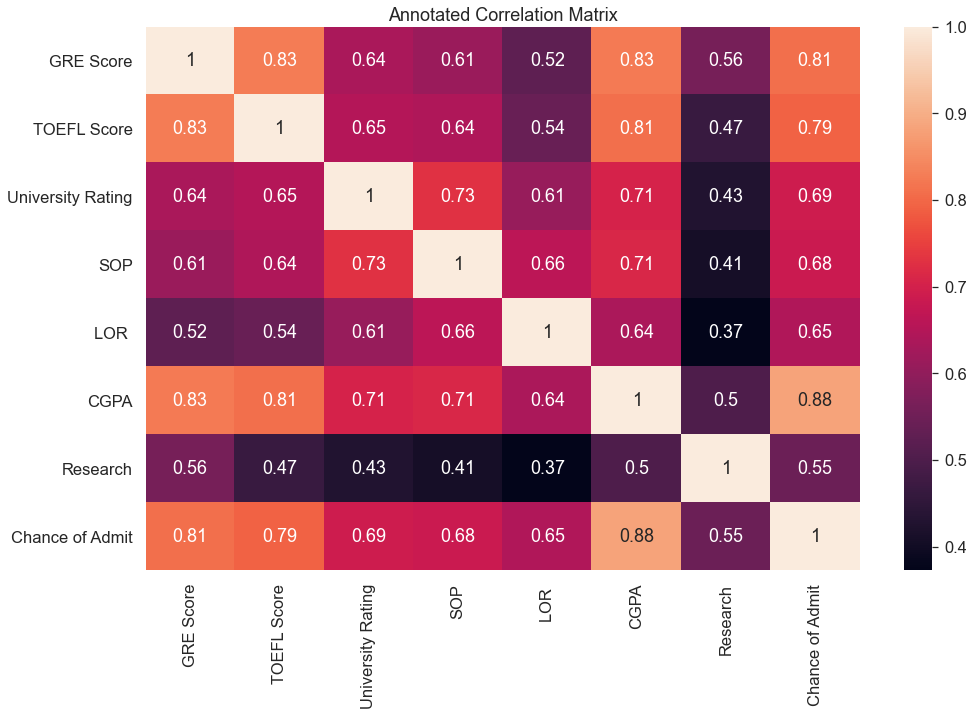

In [14]:
plt.rcParams['figure.figsize'] = (16, 10)

sb.set(font_scale = 1.5)
sb.set_style(style='white')

sb.heatmap(gradData.corr(), annot = True).set_title('Annotated Correlation Matrix')

From the Pandas Profiling report, we can see that there is no missing data, there is 7 numeric variables and 1 categorical variable (Research) and that there are some strong correlations between several variables: Chance of Admit and CGPA, CGPA and GRE Score, TOEFL Score and GRE Score, TOEFL and Chance of Admit. These variable correlations are made clearer with the annotated correlation matrix above.

## Step 4: Histograms of variables in the dataset

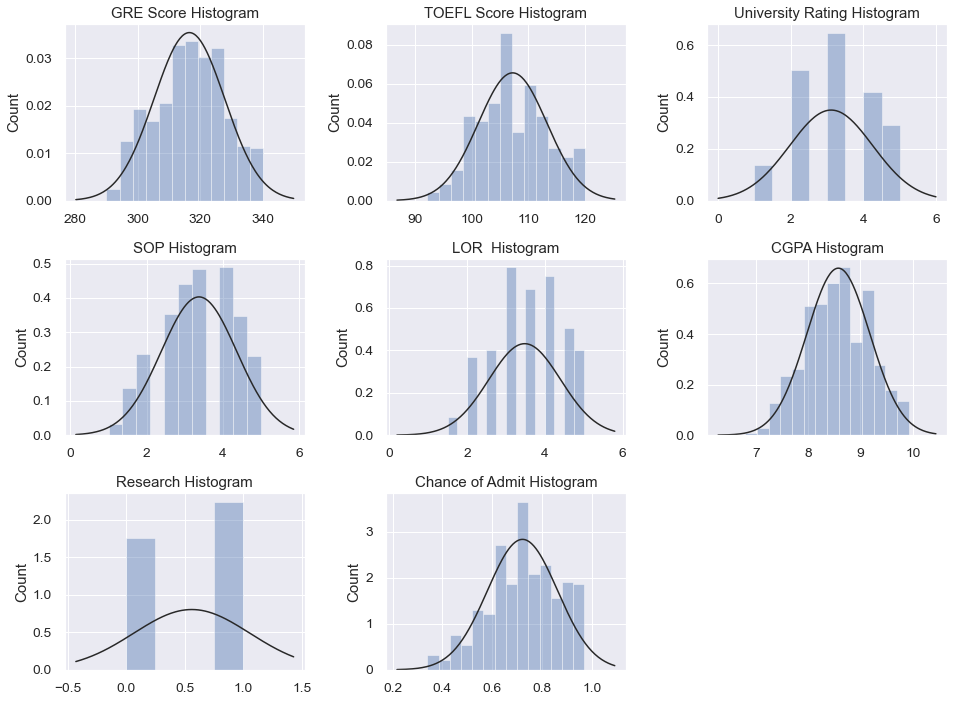

In [7]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.8, wspace=0.5)
fig.set_size_inches(13.5, 10)
sb.set(font_scale = 1.25)

i = 1
for var in gradData.columns:
    fig.add_subplot(3, 3, i)
    sb.distplot(pd.Series(gradData[var], name=''),
                fit=norm, kde=False).set_title(var + " Histogram")
    plt.ylabel('Count')
    
    i += 1

fig.tight_layout()

## Step 5: Using Parallel Coordinates visualization to compare the distributions of numerical variables between prospective students that had research experience and those that did not.

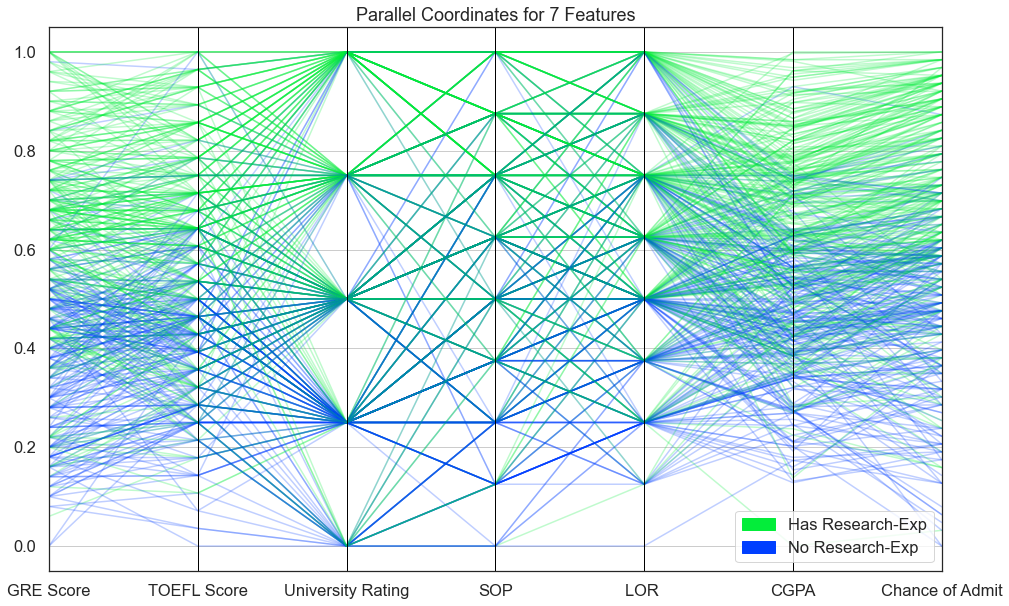

In [9]:
plt.rcParams['figure.figsize'] = (16, 10)
sb.set(font_scale = 1.5)
sb.set_style(style='white')

set_palette('sns_bright')

classes = ['No Research-Exp', 'Has Research-Exp']
columns = gradData.columns.delete(6) # Remove the "Research" column

gradDataNorm = gradData.copy()

for col in columns:
    gradDataNorm[col] = ((gradData[col] - gradData[col].min()) / 
                         (gradData[col].max() - gradData[col].min()))

parrCorrData = ParallelCoordinates(classes=classes, features=columns)

parrCorrData.fit_transform(gradDataNorm[columns], gradData['Research'])
parrCorrData.poof()

From the Parallel Coordinate Graph above, we can see that (overall) prospective students that had research experience had higher scores in each variable category (including admission chance) than those that did not have any research experience. 

Thus, judging from the graph above, it is evident that students that have research experience are generally perceived to be better performers academically and have higher chances of being admitted into their graduate program.